# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
# True params: mu = 100, sigma = 15
y = [85, 100, 115]
# Another possibility for observed data...
# y = st.norm(100, 15).rvs(5).round()
print y

with pm.Model() as model:
    # Priors
    tau = pm.Gamma("tau", .001, .001)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, tau=tau, observed=y)
    # Sample
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000

[85, 100, 115]
Optimization terminated successfully.
         Current function value: 28.821201
         Iterations: 36
         Function evaluations: 41
         Gradient evaluations: 41


100%|██████████| 10000/10000 [00:01<00:00, 6356.06it/s]


In [3]:
pm.df_summary(trace[burn_in:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,98.877912,18.048947,0.631080,62.787982,133.645260
tau,0.004286,0.004381,0.000153,0.000013,0.012855


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11600b610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116151490>]], dtype=object)

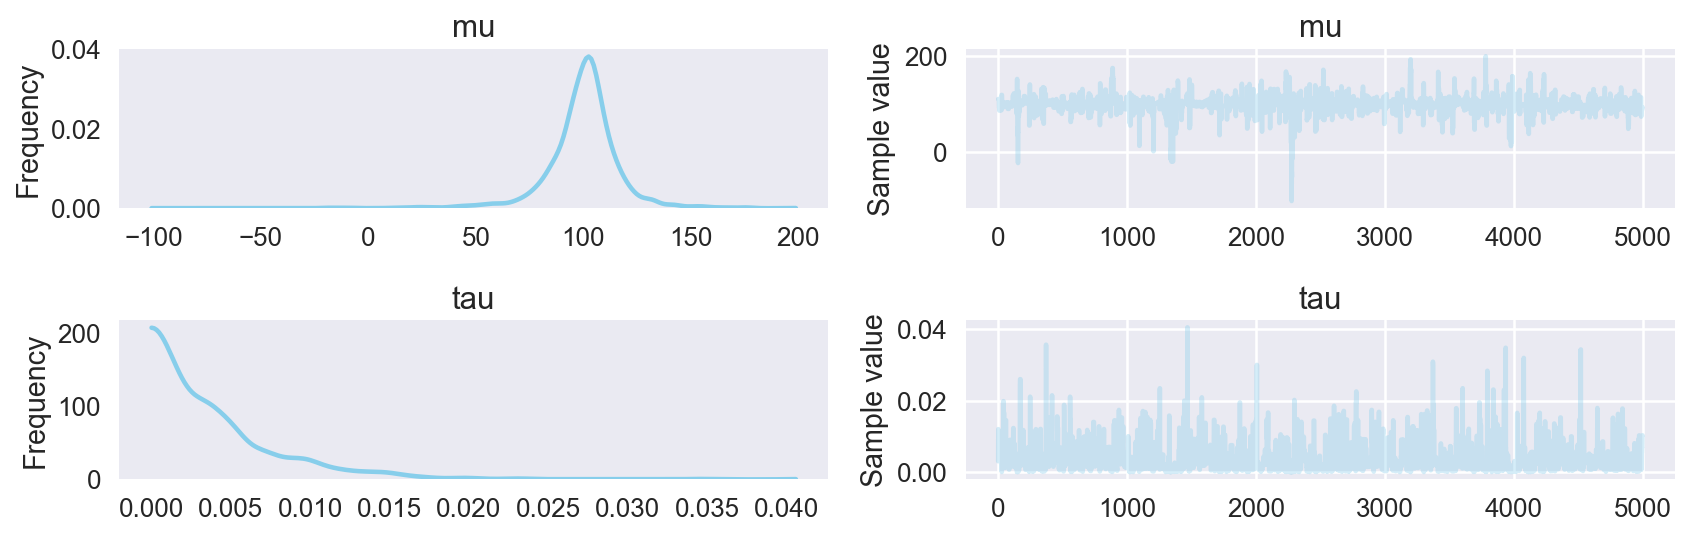

In [4]:
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115fe12d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116a01f50>], dtype=object)

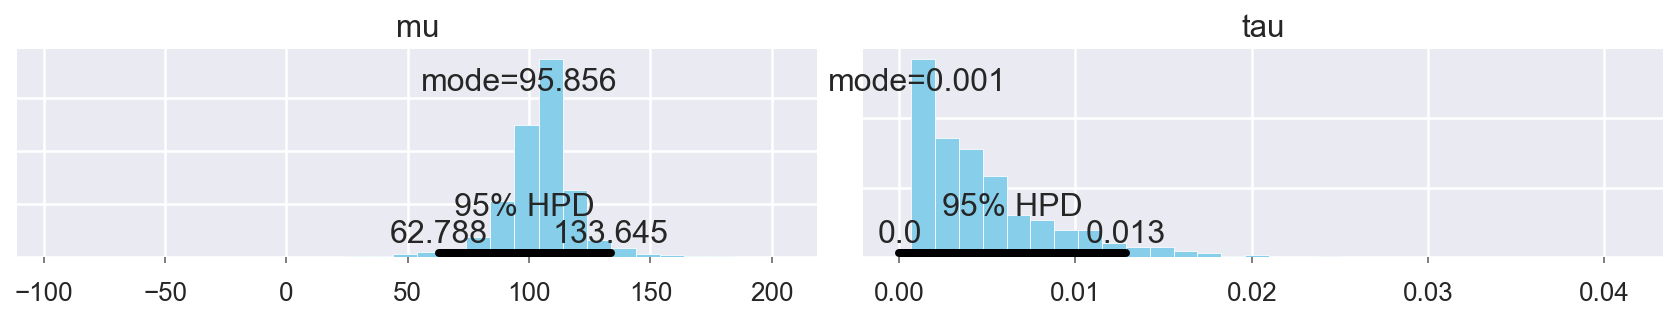

In [5]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")